<a href="https://colab.research.google.com/github/qhz-23/lecture1/blob/main/Sec_1_Homework_1_20230112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import statsmodels.api as sm

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

# 1.) Import Data from FRED

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
data = pd.read_csv("/content/gdrive/MyDrive/TaylorRuleData.csv", index_col = 0)

In [14]:
data.dropna(inplace = True)
data

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


In [15]:
data.index = pd.to_datetime(data.index)

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [16]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [17]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [18]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [19]:
model1 = sm.OLS(y_in, X_in).fit()
model1

# 4.) Recreate the graph fro your model

In [20]:
import matplotlib.pyplot as plt

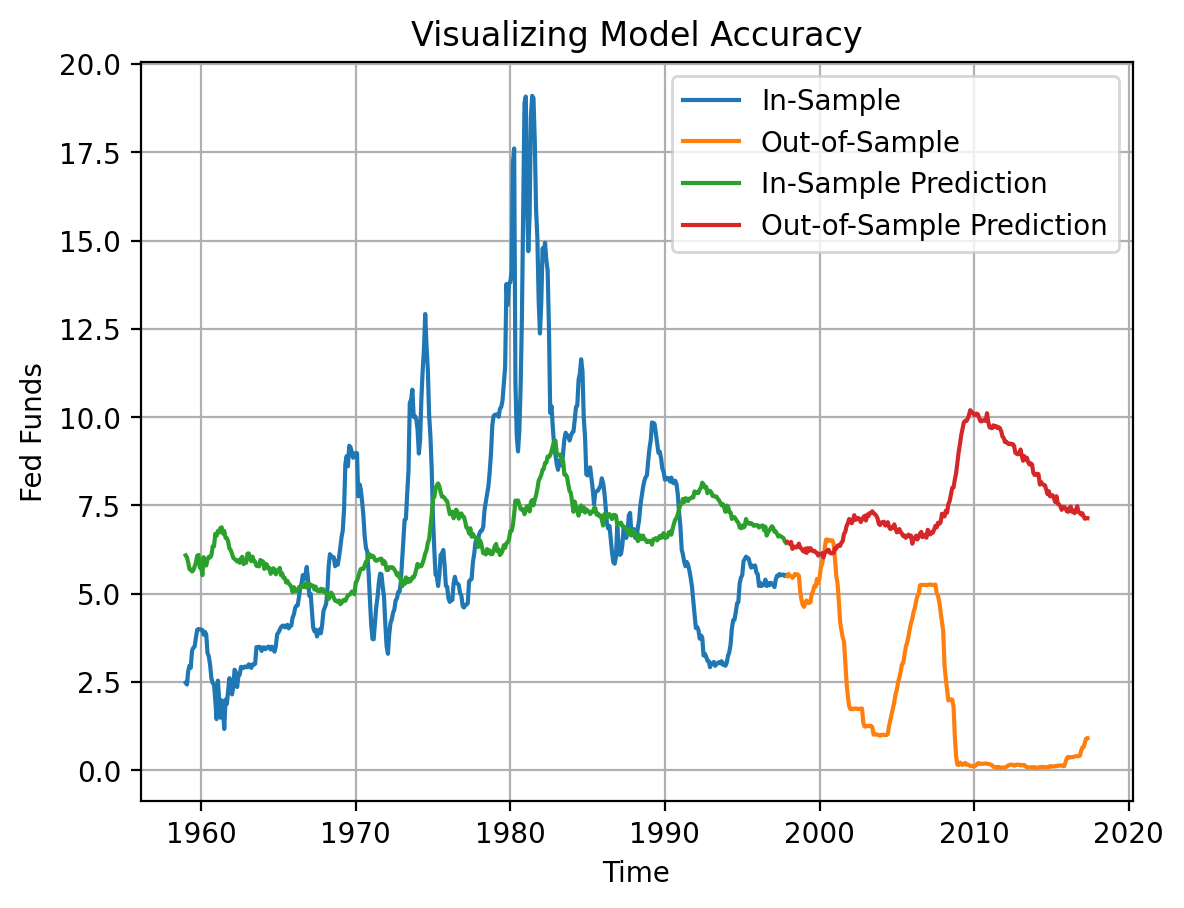

In [25]:
plt.plot(y_in) # In-Sample
plt.plot(y_out) # Out-of-Sample
plt.plot(model1.predict(X_in)) # In-Sample Prediction
plt.plot(model1.predict(X_out)) # Out-of-Sample Prediction

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(["In-Sample", "Out-of-Sample", "In-Sample Prediction", "Out-of-Sample Prediction"])
plt.grid()
plt.show()

# Conclusion: The model underfits In-Sample while overfits Out-of-Sample Performance

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
in_mse_1 =  mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [29]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566727


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
max_degrees = 3

DEGREE :  1


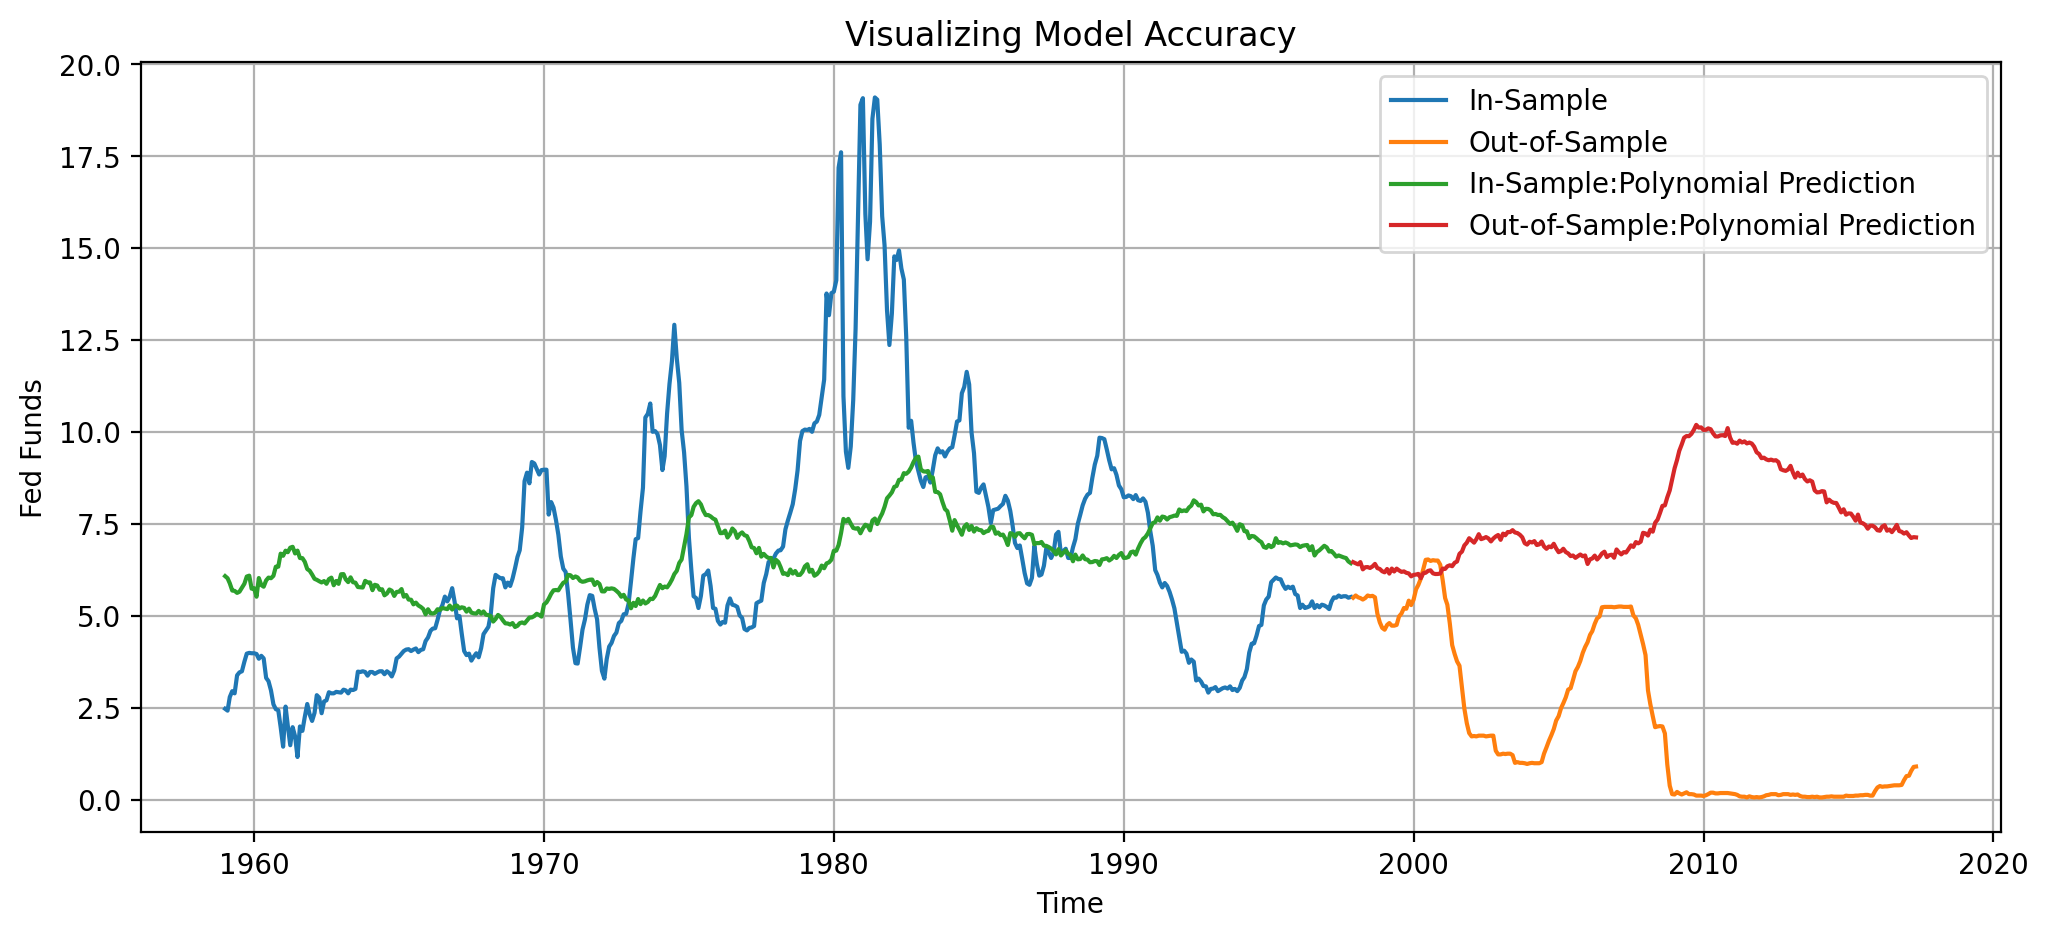

In-Sample MSE :  10.071422013168641
Out-of-Sample MSE :  40.36082783566789
DEGREE :  2


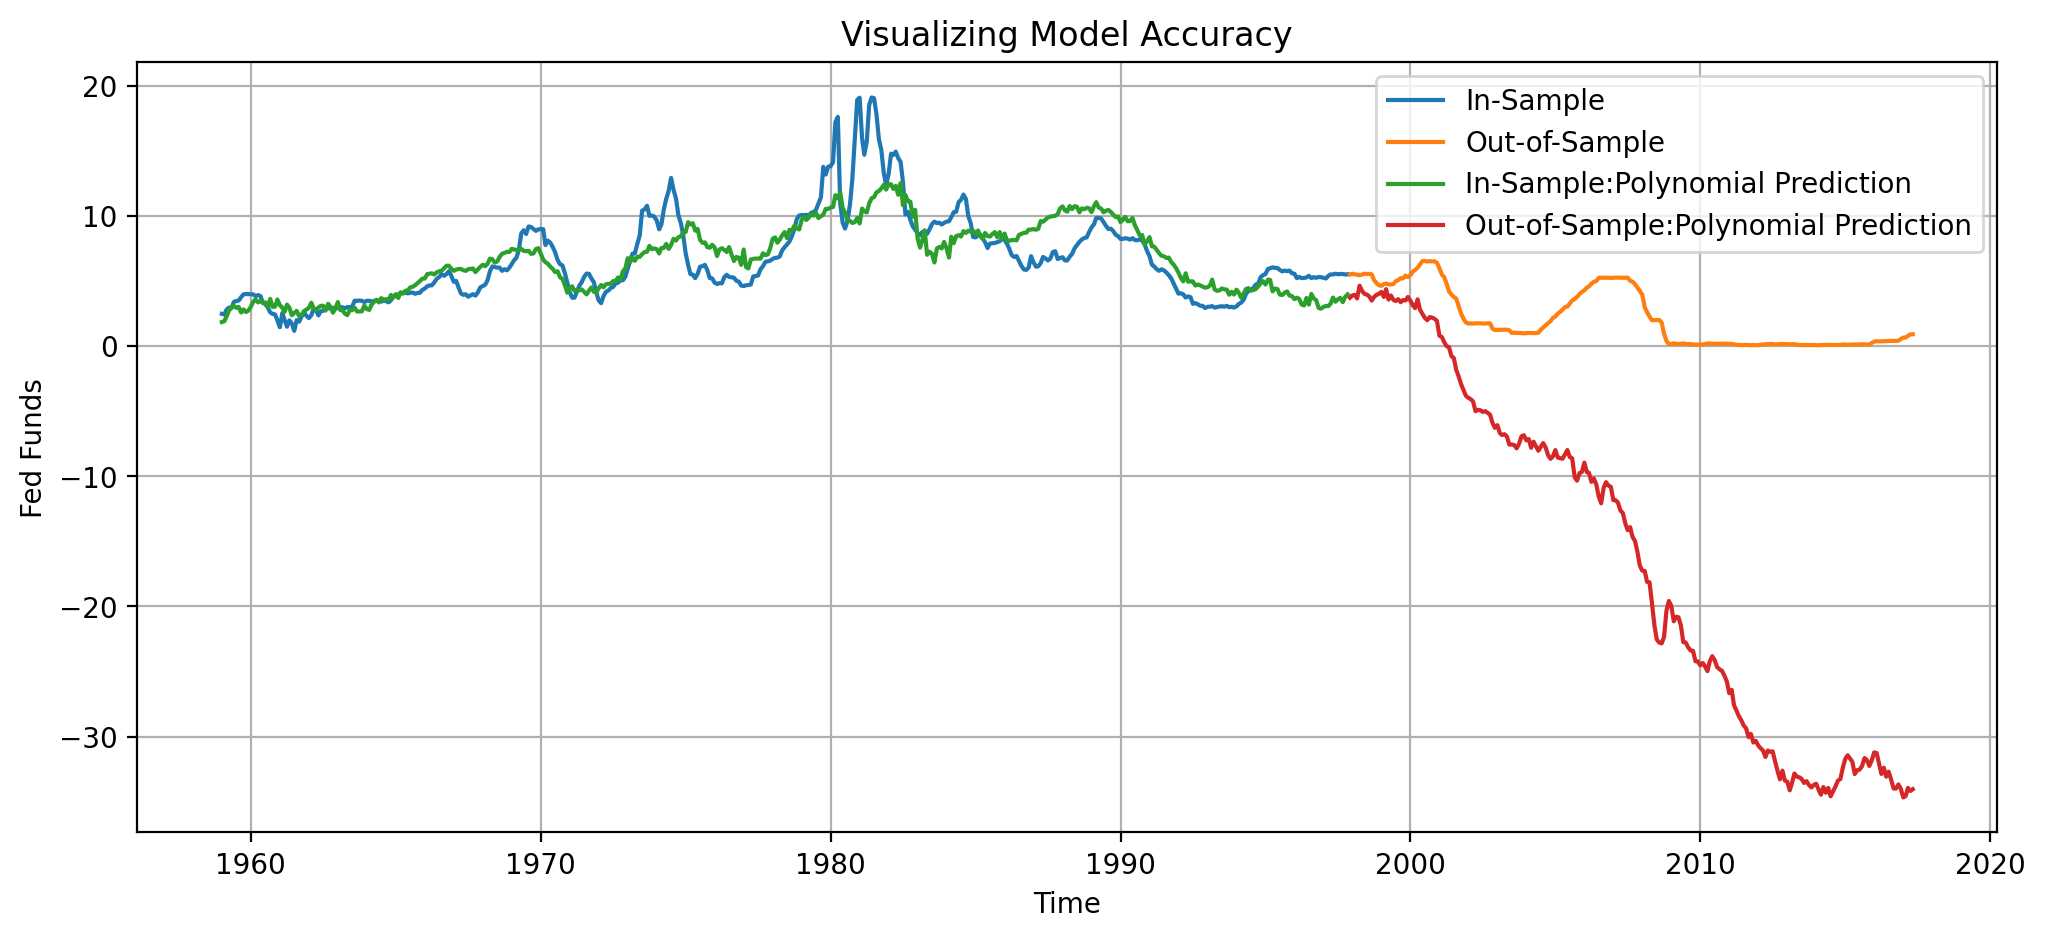

In-Sample MSE :  3.8634771392760685
Out-of-Sample MSE :  481.4465099284275
DEGREE :  3


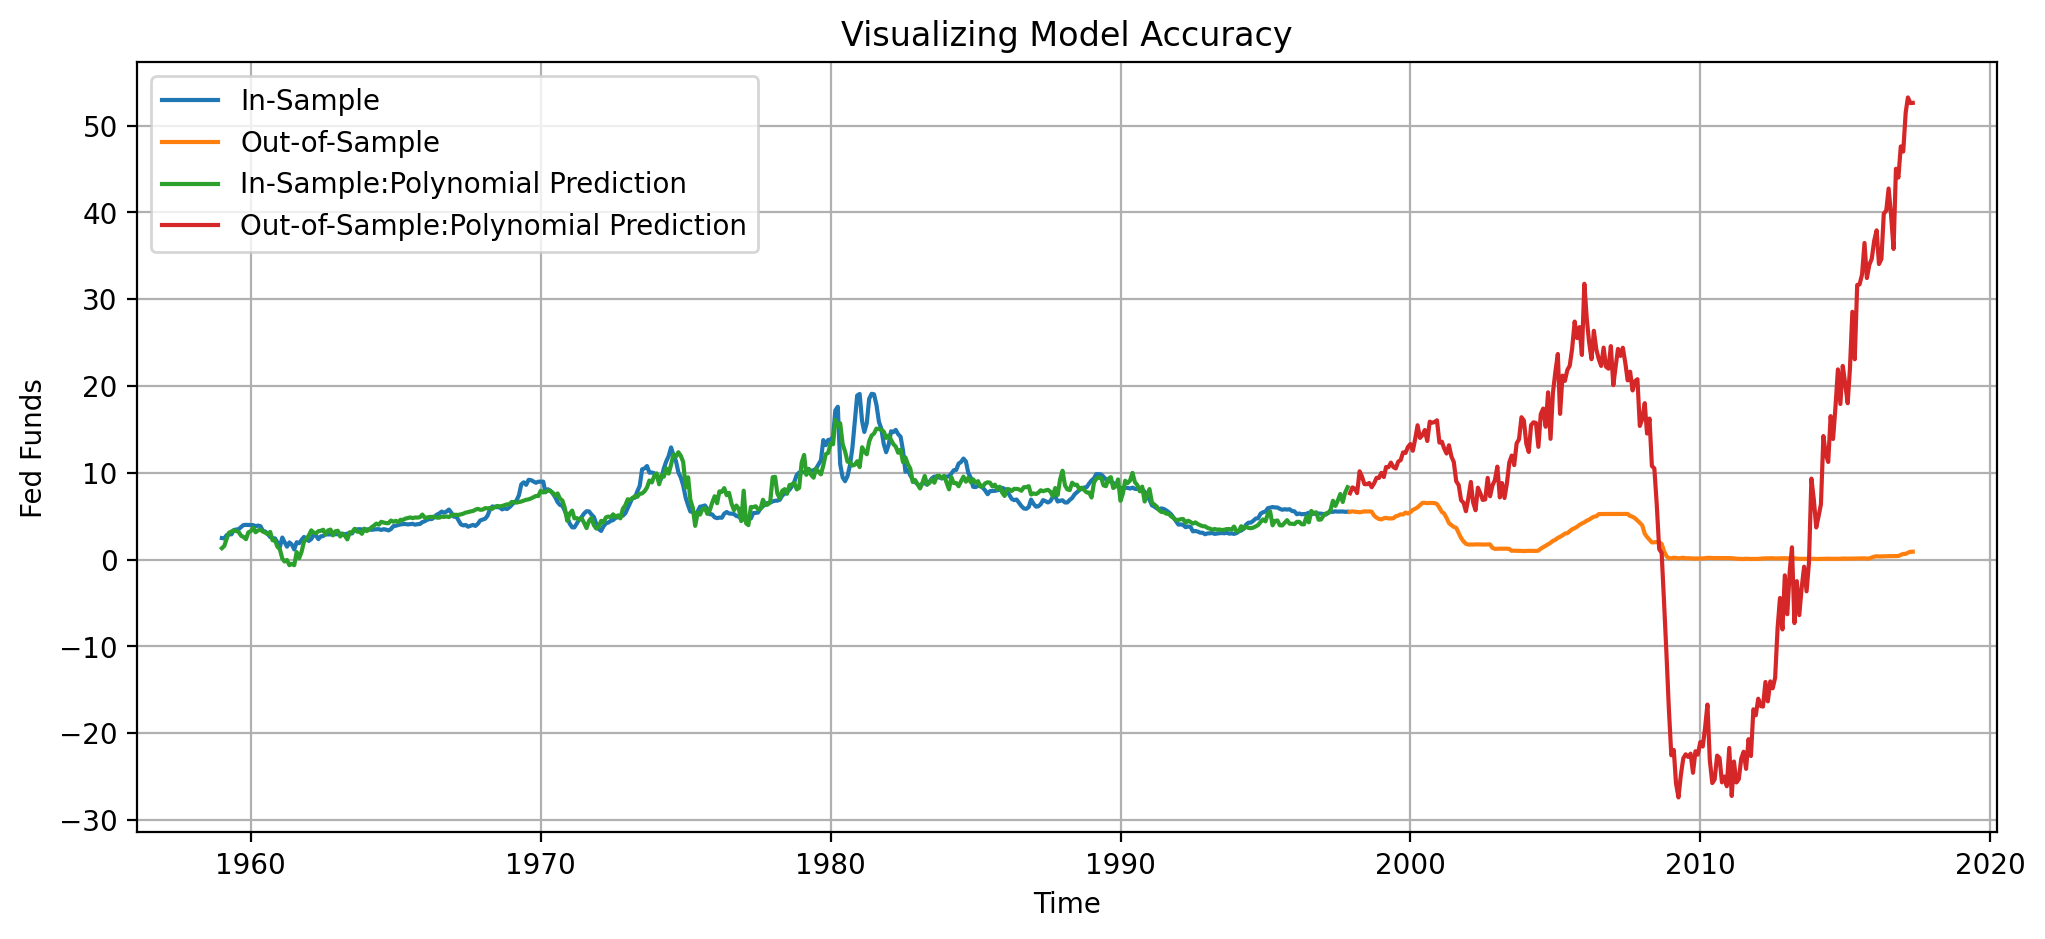

In-Sample MSE :  1.8723636268027466
Out-of-Sample MSE :  371.76780338979415


In [32]:
for degrees in range(1, max_degrees + 1):
    print("DEGREE : ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)

    # Step 3).
    model_poly = sm.OLS(y_in, X_in_poly).fit()

    # Step 4).
    plt.figure(figsize = (12,5))

    pred_in = model_poly.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)
    pred_out = model_poly.predict(X_out_poly)
    pred_out = pd.DataFrame(pred_out, index = y_out.index)

    plt.plot(y_in) # In-Sample
    plt.plot(y_out) # Out-of-Sample
    plt.plot(pred_in) # In-Sample Prediction
    plt.plot(pred_out) # Out-of-Sample Prediction
    %config InlineBackend.figure_format = 'retina'

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In-Sample", "Out-of-Sample", "In-Sample:Polynomial Prediction",
                "Out-of-Sample:Polynomial Prediction"])
    plt.grid()
    plt.show()

    # Step 5).
    in_mse_poly =  mean_squared_error(model_poly.predict(X_in_poly), y_in)
    out_mse_poly = mean_squared_error(model_poly.predict(X_out_poly), y_out)
    print("In-Sample MSE : ", in_mse_poly)
    print("Out-of-Sample MSE : ", out_mse_poly)

# 7.) State your observations :

As I increase the complexity of the model by including higher polynomial orders, the error within the data used for training (in-sample) significantly decreases, indicating a good fit to the training data. However, this improvement is misleading because when you apply the model to new, unseen data (out-of-sample), the error dramatically increases. Essentially, the model becomes too tailored to the training data and struggles to generalize well to new data (overfitting).